In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

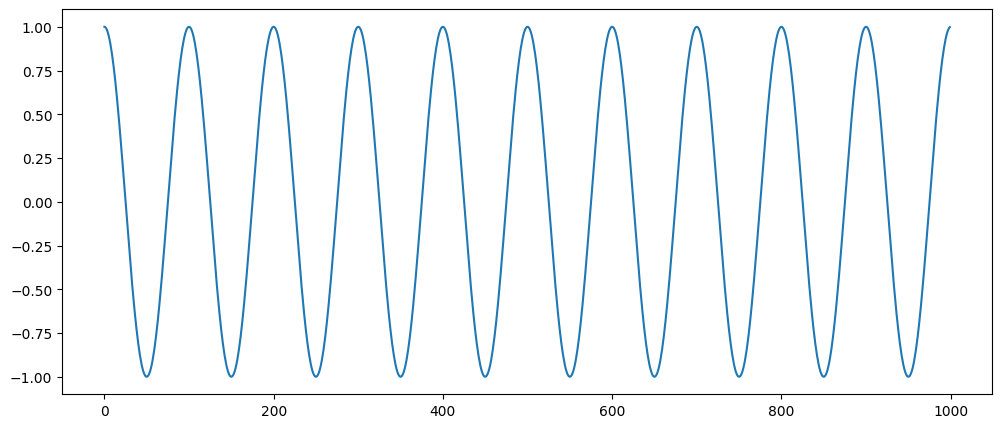

In [2]:
#matplotlib inline
plt.ion()
plt.show()
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
x = np.arange(len(dataset))
plt.figure(figsize=(12,5))
plt.plot(x, dataset)
plt.title("")
plt.show()

In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

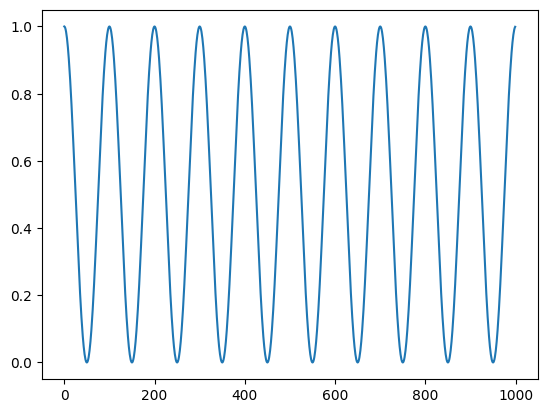

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
plt.plot(x, dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [8]:
#define the model
batch_size = 1
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#train the model
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=batch_size, verbose=2)

Epoch 1/50
650/650 - 4s - loss: 0.0883 - accuracy: 0.0154 - 4s/epoch - 6ms/step
Epoch 2/50
650/650 - 3s - loss: 0.0362 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 3/50
650/650 - 3s - loss: 0.0265 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 4/50
650/650 - 3s - loss: 0.0232 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 5/50
650/650 - 3s - loss: 0.0227 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 6/50
650/650 - 3s - loss: 0.0205 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 7/50
650/650 - 3s - loss: 0.0178 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 8/50
650/650 - 3s - loss: 0.0172 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 9/50
650/650 - 3s - loss: 0.0173 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 10/50
650/650 - 3s - loss: 0.0185 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 11/50
650/650 - 3s - loss: 0.0157 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 12/50
650/650 - 3s - loss: 0.0149 - accuracy: 0.0200 - 3s/epoch - 4ms/step
Epoch 13/50
650/650 - 3s - loss: 0.01

In [10]:
#evaluate the model
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

Train Score:  [0.0017415459733456373, 0.019999999552965164]
Test Score:  [0.001816361676901579, 0.01984127052128315]


In [11]:
#predictions
look_ahead = 200
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    new_data_point = np.array([[dataset[670 + i]]])  # Wrap the value in a 2D array
    new_data_point = new_data_point.reshape(1, 1)    # Reshape to (1, 1)
    #trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))
    trainPredict.append(np.vstack([trainPredict[-1][1:], new_data_point]))

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


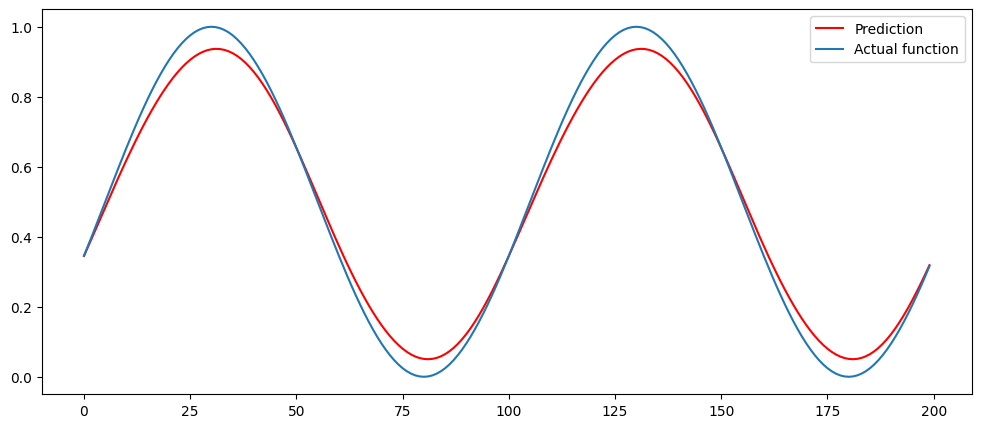

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="Prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="Actual function")
plt.legend()
plt.show()
plt.draw()